In [ ]:
#data cleaning

In [21]:
#load necessary library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder


step 2: load database

In [4]:
#read dataset
df = pd.read_csv('../ml/laptop_price.csv',encoding='latin1')
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [5]:
df.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,638.0
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,1499.0
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,229.0
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,764.0
1302,1320,Asus,X553SA-XX031T (N3050/4GB/500GB/W10),Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.20,369.0


step 3: sanaty check

In [6]:
# shape
df.shape 

(1303, 13)

In [7]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 132.5+ KB


In [8]:
# finding missing values
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [9]:
# check null value count in percentage
df.isnull().sum()/df.shape[0]*100


laptop_ID           0.0
Company             0.0
Product             0.0
TypeName            0.0
Inches              0.0
ScreenResolution    0.0
Cpu                 0.0
Ram                 0.0
Memory              0.0
Gpu                 0.0
OpSys               0.0
Weight              0.0
Price_euros         0.0
dtype: float64

In [10]:
#finding duplicates
df.duplicated().sum()

np.int64(0)

In [11]:
# finding garbage value
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("***" * 10)

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64
******************************
Product
XPS 13                                   30
Inspiron 3567                            29
250 G6                                   21
Vostro 3568                              19
Legion Y520-15IKBN                       19
                                         ..
ThinkPad L460                             1
V510-15IKB (i5-7200U/8GB/256GB/FHD/No     1
Rog GL502VS                               1
Rog GL553VE-FY052T                        1
17-ak001nv (A6-9220/4GB/500GB/Radeon      1
Name: count, Length: 618, dtype: int64
******************************
TypeName
Notebook              727
Gaming         

step4 : exploration data analysis

In [12]:
df.describe()

,laptop_ID,Inches,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,660.155794,15.017191,2.038734,1123.686992
std,381.172104,1.426304,0.665475,699.009043
min,1.000000,10.100000,0.690000,174.000000
25%,331.500000,14.000000,1.500000,599.000000
50%,659.000000,15.600000,2.040000,977.000000
75%,990.500000,15.600000,2.300000,1487.880000
max,1320.000000,18.400000,4.700000,6099.000000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
laptop_ID,1303.0,660.155794,381.172104,1.00,331.5,659.00,990.50,1320.0
Inches,1303.0,15.017191,1.426304,10.10,14.0,15.60,15.60,18.4
Weight,1303.0,2.038734,0.665475,0.69,1.5,2.04,2.30,4.7
Price_euros,1303.0,1123.686992,699.009043,174.00,599.0,977.00,1487.88,6099.0


In [24]:
df.describe(include="object")

,count,unique,top,freq
Company,1303,19,Dell,297
Product,1303,618,XPS 13,30
TypeName,1303,6,Notebook,727
ScreenResolution,1303,40,Full HD 1920x1080,507
Cpu,1303,118,Intel Core i5 7200U 2.5GHz,190
Ram,1303,9,8GB,619
Memory,1303,39,256GB SSD,412
Gpu,1303,110,Intel HD Graphics 620,281
OpSys,1303,9,Windows 10,1072
Weight,1303,179,2.2kg,121


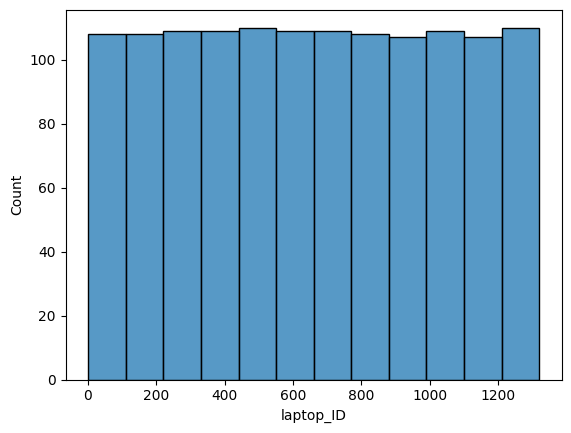

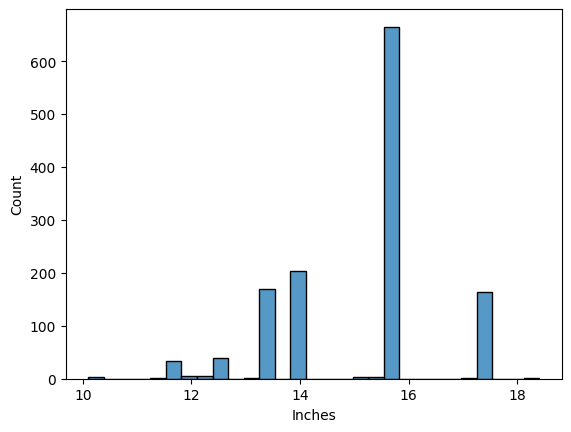

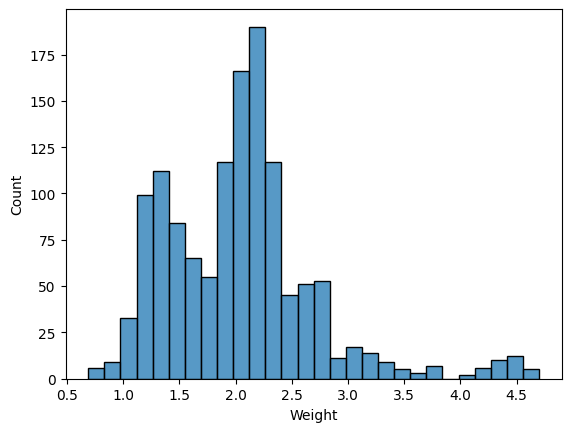

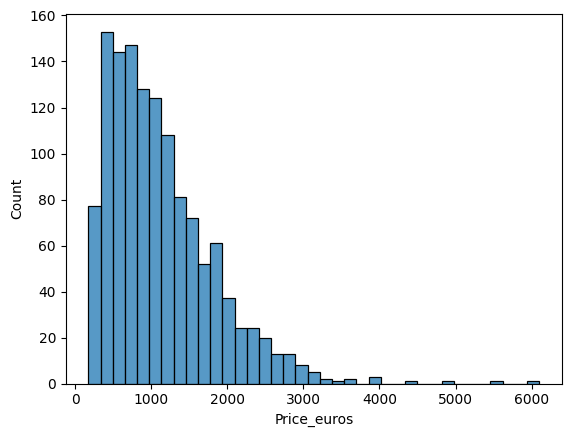

In [14]:
# histogram for understand the distribution
for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df,x=i)
    plt.show()
    
    
    

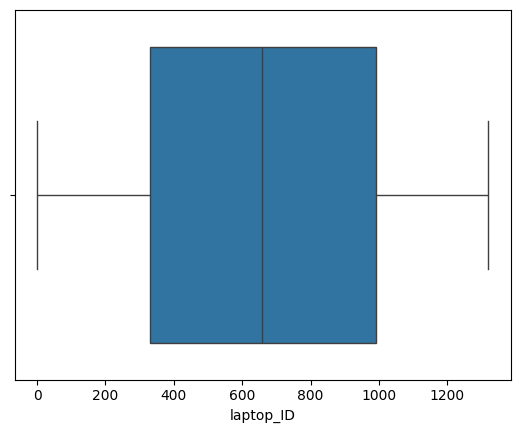

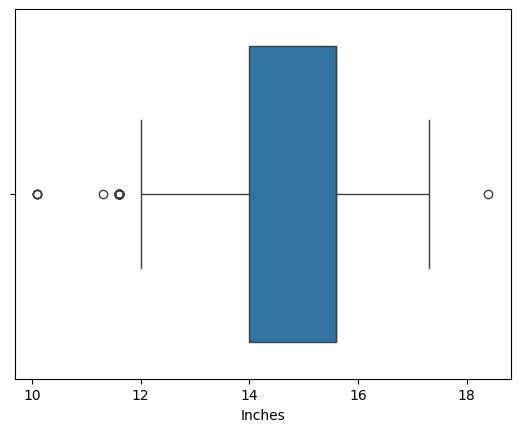

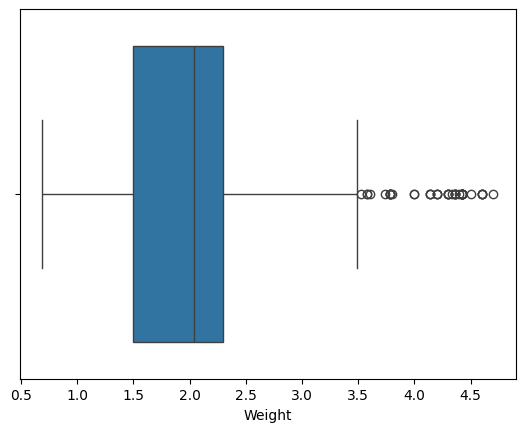

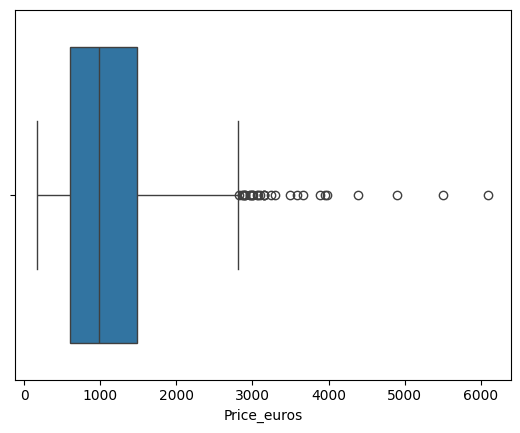

In [15]:
# boxplot for indentify the outliners 
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [16]:
# finding the numeric value column
df.select_dtypes(include="number").columns

Index(['laptop_ID', 'Inches', 'Weight', 'Price_euros'], dtype='object')

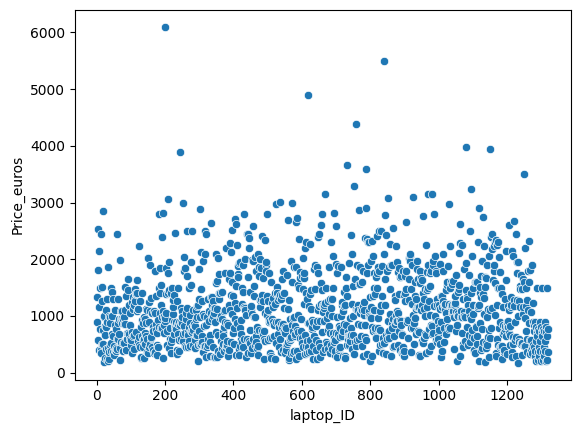

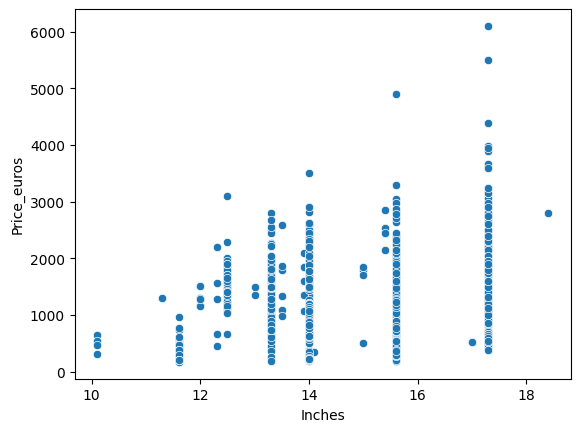

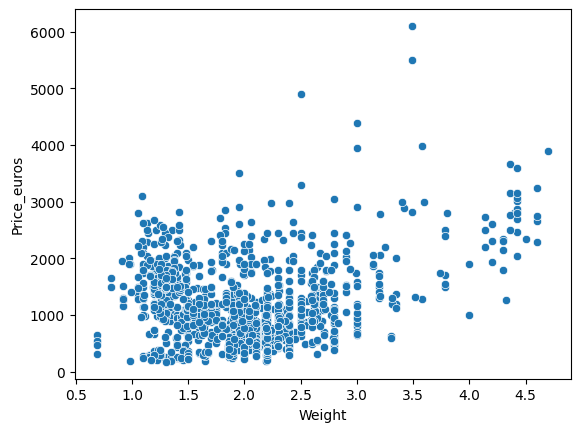

In [17]:
# scatter plot to undersatnd the relationship
for i in ['laptop_ID', 'Inches','Weight']:
    sns.scatterplot(data=df,x=i,y='Price_euros')
    plt.show()

step 5: missing value treatment

In [18]:
# in this data we do not any missing value 
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

step 6: outlier treatment

In [24]:
# we do not have to remove outlier from target value
#in this data we have to remove outlier from inches column
# we will use IQR method to remove outlier from inches 


def wisker(col):
    q1,q3 = np.percentile(col,[25,75])
    iqr = q3 - q1
    lw = q1 - 1.5*iqr
    uw = q1 + 1.5*iqr
    return lw,uw
       
for i in ["Inches","Weight","Price_euros"]:
    lw,uw = wisker(df[i])
    df[i]=np.where(df[i] < lw,lw,df[i])
    df[i]=np.where(df[i] > uw,uw,df[i])
    
    

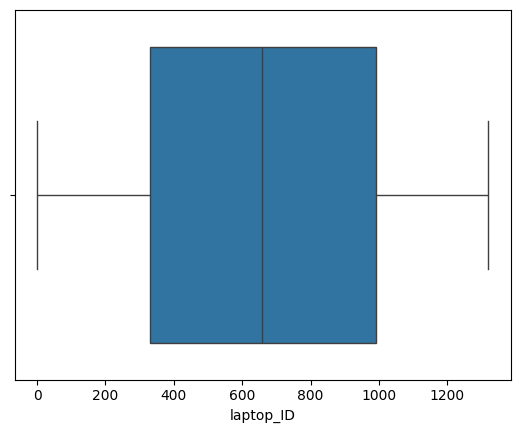

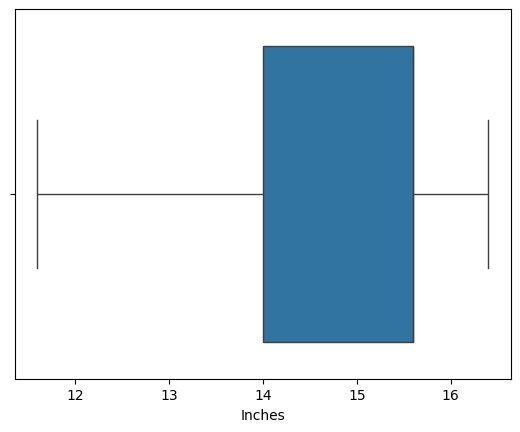

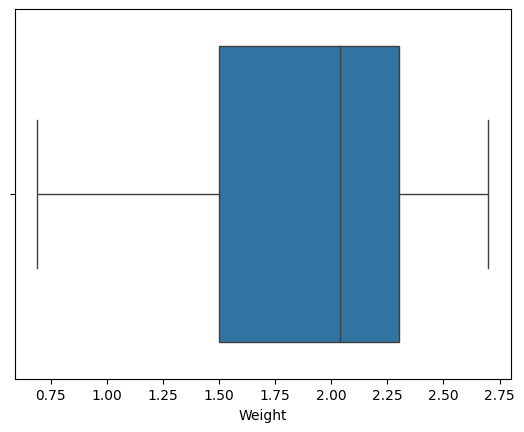

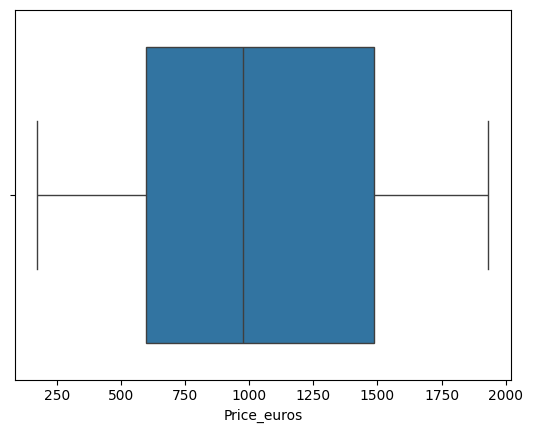

In [25]:
# check outlier remove or not
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df,x=i)
    plt.show()

step 7 : remove duplicate and garbage value

In [26]:
#in this data we do not have any duplicate value
df.duplicated().sum()
#if have than
# df.drop_duplicates()

np.int64(0)

step 8 : Encoding of data

In [27]:
# we have to convert object data into numeric form
data = pd.get_dummies(data=df,columns=["Company","Product","TypeName","ScreenResolution","Cpu","Ram","Memory","Gpu","OpSys"],drop_first=True)
data

,laptop_ID,Inches,Weight,Price_euros,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,1,13.3,1.37,1339.69,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,13.3,1.34,898.94,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,3,15.6,1.86,575.00,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4,15.4,1.83,1932.32,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,13.3,1.37,1803.60,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,14.0,1.80,638.00,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1299,1317,13.3,1.30,1499.00,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1300,1318,14.0,1.50,229.00,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1301,1319,15.6,2.19,764.00,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [28]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Columns: 963 entries, laptop_ID to OpSys_macOS
dtypes: bool(959), float64(3), int64(1)
memory usage: 1.2 MB


In [44]:

le = LabelEncoder()
encoded_df = df.copy()
# Apply LabelEncoder to each of the categorical columns individually
columns_to_encode = ["Company", "Product", "TypeName", "ScreenResolution", "Cpu", "Ram", "Memory", "Gpu", "OpSys"]

for column in columns_to_encode:
    encoded_df[column] = le.fit_transform(df[column])


In [45]:
encoded_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   int64  
 2   Product           1303 non-null   int64  
 3   TypeName          1303 non-null   int64  
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   int64  
 6   Cpu               1303 non-null   int64  
 7   Ram               1303 non-null   int64  
 8   Memory            1303 non-null   int64  
 9   Gpu               1303 non-null   int64  
 10  OpSys             1303 non-null   int64  
 11  Weight            1303 non-null   float64
 12  Price_euros       1303 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 132.5 KB


In [46]:
# Extract the features (X) and target (y)
# X = data["Inches","Weight"]
X = encoded_df.drop("Price_euros", axis=1)
y = encoded_df["Price_euros"]
print(X)

      laptop_ID  Company  Product  TypeName  Inches  ScreenResolution  Cpu  \
0             1        1      300         4    13.3                23   65   
1             2        1      301         4    13.3                 1   63   
2             3        7       50         3    15.6                 8   74   
3             4        1      300         4    15.4                25   85   
4             5        1      300         4    13.3                23   67   
...         ...      ...      ...       ...     ...               ...  ...   
1298       1316       10      580         0    14.0                13   89   
1299       1317       10      588         0    13.3                19   89   
1300       1318       10      196         3    14.0                 0   34   
1301       1319        7        2         3    15.6                 0   89   
1302       1320        2      568         3    15.6                 0   34   

      Ram  Memory  Gpu  OpSys  Weight  
0       8       4   58 

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# print(X_train,X_test,y_train,y_test)
print(len(X_test))
print(len(X_train))

261
1042


In [48]:
model = LinearRegression()


In [49]:
model.fit(X_train, y_train)



LinearRegression()

In [50]:
y_pred = model.predict(X_test)


In [51]:
mae = mean_absolute_error(y_test, y_pred)
print(mae)

293.5579391556388


In [52]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

122621.13678405953


In [53]:
# Calculate R-squared (R²) score
r2 = r2_score(y_test, y_pred)
print(r2)


0.5316025516258172
